# week 7

### 1.1 다음 코드를 실행해서 데이터 프레임을 생성하세요

In [1]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [2]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


### 1.2 데이터 프레임을 확인하고, X= calory, breakfast, lunch, dinner, exercise / y=body shape로 변수 분리하세요

In [3]:
X = df.drop("body_shape", axis = 1)
y = df["body_shape"]


### 1.3 X 데이터 값의 범위가 균일하지 않으므로 standard scaler를 이용해서 리스케일 해주세요

In [4]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

### 1.4 사이킷런 PCA 클래스를 이용해서 5차원 데이터를 1차원으로 변환하고 shape를 확인해주세요

In [5]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(x_std)
df_pca = pca.transform(x_std)
print(df_pca.shape)

(10, 1)


### 1.5 explained_variance_ratio_ 변수를 이용해서 보존된 변동성 비율을 확인해주세요

In [6]:
pca.explained_variance_ratio_

array([0.73183217])

### 1.6 적절한 차원의 수 선택하기 - 원본 데이터셋의 분산을 95%로 유지하는데 필요한 최소한의 PC 개수 즉 차원 수 d를 구하세요

In [7]:
import numpy as np

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

d

1

### 1.7 n_components를 설정하여 PCA를 다시 실행하는 인자로 보존할 분산의 비율을 넣어주세요. (분산의 비율 : 0.95) 이를 X_reduced에 저장하세요 그 후 shape을 통해서 몇차원으로 압축되었는지 확인하세요

In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_std)
X_reduced.shape

(10, 4)

### 1.8 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 다시 원래의 차원으로 되돌리세요 그 후 shape을 통해서 원래의 차원으로 잘 돌아왔는지 확인하세요

In [9]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(10, 5)

### 1.9 랜덤 PCA를 이용하여 데이터를 2차원으로 압축하세요. (random_state=42)




In [10]:
rnd_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_reduced_rnd = rnd_pca.fit_transform(x_std)
X_reduced_rnd.shape

(10, 2)

### 1.10 점진적 PCA를 이용하여 데이터를 4차원으로 압축하세요. (배치사이즈:2) 그 후 shape을 통해 확인하세요




In [11]:
from sklearn.decomposition import IncrementalPCA



In [12]:
n_batches = 2
inc_pca = IncrementalPCA(n_components=4)
for X_batch in np.array_split(x_std, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_inc = inc_pca.transform(x_std)
X_reduced_inc.shape

(10, 4)

### 1.11 커널 PCA를 이용하여 데이터를 2차원으로 압축하세요. (kernel="rbf",gamma=0.4) 그 후 shape을 통해 확인하세요


In [13]:
from sklearn.decomposition import KernelPCA

In [14]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf",gamma=0.4)
X_reduced = rbf_pca.fit_transform(x_std)
X_reduced.shape

(10, 2)

### 1.12 커널 PCA의 하이퍼파라미터를 선택하세요 kPCA를 이용하여 2차원으로 축소하고 Logistic Regression으로 Classification을 진행하세요. 그 다음 가장 높은 accuracy를 얻기 위해 GridSearchCV를사용하여 kPCA에 가장 좋은 커널과 gamma 파라미터를 구하세요.
이때, kpca__kernel은 ["linear", "poly", "rbf", "sigmoid", "cosine"], kpca__gamma"은 np.linspace(0.03, 0.05, 1,2,10)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [16]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver='lbfgs'))
])

param_grid = [{
    "kpca__kernel": ["linear", "poly", "rbf", "sigmoid", "cosine"], 
    "kpca__gamma" : np.linspace(0.03, 0.05, 1,2,10)
}]

grid_search = GridSearchCV(clf, param_grid, cv=2)
grid_search.fit(x_std, y)

print(grid_search.best_params_)

{'kpca__gamma': array([0.03]), 'kpca__kernel': 'linear'}


C:\Users\yujin\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yujin\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yujin\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\yujin\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\ProgramData\Anaconda3\envs\yujinyeo\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\yujin\AppData\Roaming\Python\Python38\site-packages\sklearn\pipel

### 2.1 다음 iris 데이터 세트를 출력해주세요

In [17]:
from sklearn.datasets import load_iris
iris=load_iris()
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target

### 2.2 X 데이터 값을 standard scaler를 이용해서 표준화 해주세요

In [18]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

### 2.3 PCA를 이용해 4차원 데이터를 2차원으로 변환해주세요

In [19]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape

(150, 2)

### 2.4 PCA 변환된 데이터의 칼럼 명을 pca_component1, pca_component2로 명명해서 새로운 dataframe을 만들어주세요

In [20]:
pca_columns = ['pca_component1', 'pca_component2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head()

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


### 2.5 원본 데이터와 PCA 데이터를 각각 XGBoost로 학습시키고 (random_state=15), cross_val_score()로 5개의 교차 검증 세트로 정확도를 비교해주세요

In [21]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(irisDF, iris.target)

xgb.fit(irisDF_pca, iris.target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

### 3.1 기본적인 LDA 구현을 위한 라이브러리를 import 해주세요. 와인 데이터도 로드해주세요.

In [22]:
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



### 3.2 X에는 features를 y에는 target을 저장해주세요.

In [23]:
wine = load_wine()

df_wine = pd.DataFrame(data = wine.data, columns=[wine.feature_names])
df_wine['target'] = wine.target


X = df_wine.drop('target', axis=1)
y = df_wine['target']



C:\Users\yujin\AppData\Local\Temp\ipykernel_10996\3044659512.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df_wine.drop('target', axis=1)


### 3.3 X의 형태를 확인해주세요. (178,13)이 나와야합니다.

In [24]:
X.shape

(178, 13)

### 3.4 X의 행 5개를 확인해주세요.

In [25]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 3.5 target들의 종류를 확인해주세요.

In [26]:
y.value_counts()

(target,)
1            71
0            59
2            48
dtype: int64

### 3.6 X_lda에 lda를 fit해주세요. 

In [27]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
wine_lda = lda.transform(X)

wine_lda.shape

C:\Users\yujin\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(178, 2)

### 3.7 2차원 평면에 표현해주세요. 교재 395페이지를 참조해주세요.

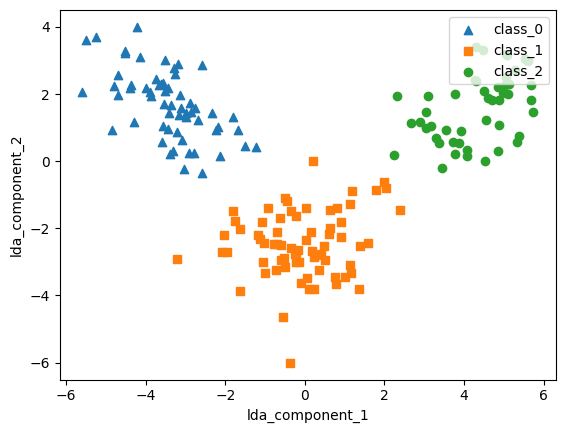

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
wine_lda = pd.DataFrame(wine_lda,columns=lda_columns)
wine_lda['target']=wine.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = wine_lda[wine_lda['target']==i]['lda_component_1'],
    y_axis_data = wine_lda[wine_lda['target']==i]['lda_component_2'],

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()